In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_1140847/467601789.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import glob

# Pattern to recursively match CSV files in subdirectories of each model_div*
csv_pattern = '../runs/model_div[1-5]/MineField*/**/*csv'

# Use glob with recursive flag set to True
csv_files = glob.glob(csv_pattern, recursive=True)

csv_files

for csv_file in csv_files:
    print(csv_file)  # or process each CSV file as needed

../runs/model_div2/MineFieldEnv-v0__minigrid-test-ppo__1__1710406127/results.csv
../runs/model_div1/MineFieldEnv-v0__minigrid-test-ppo__1__1710405604/results.csv
../runs/model_div4/MineFieldEnv-v0__minigrid-test-ppo__1__1710406549/results.csv
../runs/model_div3/MineFieldEnv-v0__minigrid-test-ppo__1__1710406263/results.csv
../runs/model_div5/MineFieldEnv-v0__minigrid-test-ppo__1__1710406692/results.csv


In [5]:
# Initialize a list to hold the data from each CSV
data_list = []

# Loop through each results file, load it, and store it along with the total parameters
for result_path in csv_files:
    df = pd.read_csv(result_path)
    # Assume the first row's total parameters value is representative for all rows in the CSV
    total_parameters = df['# Total Parameters'].iloc[0] if '# Total Parameters' in df.columns else None
    data_list.append((df, total_parameters))


In [17]:
import re
s = data_list[1][0]['Model Summary'][0]
# Extracting all Linear layer sizes
all_sizes = re.findall(r'Linear\(in_features=(\d+), out_features=\d+, bias=\w+\)', s)

# Getting all instances after the first Linear layer
sizes_after_first = all_sizes[1:]

sizes_after_first


['128', '256', '512']

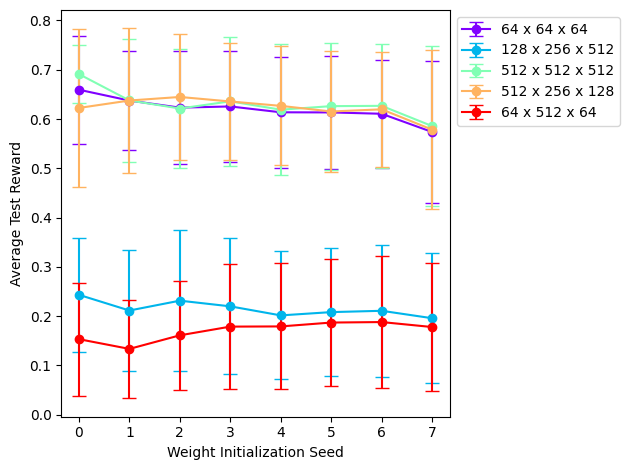

In [30]:
# Create a color map based on the unique total parameters
unique_params = list(set([data[1] for data in data_list]))
color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_params)))

# Plot each set of data with its associated color
for (df, total_parameters), color in zip(data_list, color_map):
    arch = df['Model Summary'][0]
    arch = re.findall(r'Linear\(in_features=(\d+), out_features=\d+, bias=\w+\)', arch)[1:]

    temp = ''
    for idx, neuron in enumerate(arch):
        if idx == len(arch) - 1:
            temp += neuron
        else:
            temp += neuron + ' x '

    plt.errorbar(df['Seed'], df['Average Test Reward'], yerr=df['Test Reward Variance'], fmt='-o', capsize=5, label=f'{temp}', color=color)

# plt.title(f'Test Reward vs. Seed Across Architectures on MineField Environment')
plt.xlabel('Weight Initialization Seed')
plt.ylabel('Average Test Reward')

# plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()


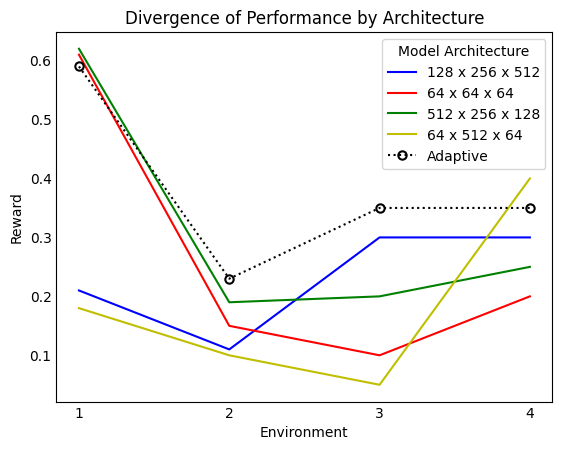

In [7]:
# Define your x-axis (common for all arrays, assuming uniform spacing)
x = np.arange(1, 5)

# Define arrays for y-values. Adjust these arrays to change the slopes.
y1 = np.array([0.21, 0.11, 0.3, 0.3])  # Example array 1
y2 = np.array([0.61, 0.15, 0.1, 0.2])  # Example array 2
y3 = np.array([0.62, 0.19, 0.2, 0.25])  # Example array 3
y4 = np.array([0.18, 0.1, 0.05, 0.4])
y5 = np.array([0.59, 0.23, 0.35, 0.35])

# Plotting  
plt.plot(x, y1, 'b-', label='128 x 256 x 512')
plt.plot(x, y2, 'r-', label='64 x 64 x 64')
plt.plot(x, y3, 'g-', label='512 x 256 x 128')
plt.plot(x, y4, 'y-', label='64 x 512 x 64')
plt.plot(x, y5, 'ko:', markerfacecolor='none', markeredgewidth=1.5, label='Adaptive')

plt.xticks(x)
plt.tick_params(axis='both', which='both', length=0)
# Adding labels and title
plt.xlabel('Environment')
plt.ylabel('Reward')
plt.title('Divergence of Performance by Architecture')
plt.legend(title='Model Architecture')

# Show plot
plt.show()